In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots

In [4]:


banpo1 = pd.read_csv("./banpo1_join.csv")
newrec1 = pd.read_csv("./NewREC1_join.csv")
lh = pd.read_csv("./LH1_join.csv")
miribeol = pd.read_csv("./miribeol_join.csv")
ongok = pd.read_csv("./ongok_join.csv")
# myosan = pd.read_csv("./myosan_join.csv")

banpo1.head(5)

,Unnamed: 0,env_slopesolar,env_levelsolar,match_solar,watt,datetime,datemonth,diff1,diff2,reset_match
0,2018-10-23 09:00,223.842857,212.557143,69.444444,3678.650820,9,10,154.398413,143.112698,102.089687
1,2018-10-26 09:00,56.342857,42.842857,19.444444,890.937313,9,10,36.898413,23.398413,28.585112
2,2018-10-28 09:00,140.085714,115.471429,33.333333,2419.312500,9,10,106.752381,82.138095,49.003050
3,2018-10-29 09:00,392.457143,403.028571,280.555556,6811.950000,9,10,111.901587,122.473016,412.442334
4,2018-10-30 09:00,398.542857,408.814286,247.222222,7150.008163,9,10,151.320635,161.592063,363.439284


In [6]:
banpo1_date = pd.to_datetime(banpo1["Unnamed: 0"])
newrec1_date = pd.to_datetime(newrec1["Unnamed: 0"])
lh_date = pd.to_datetime(lh["Unnamed: 0"])
miribeol_date = pd.to_datetime(miribeol["Unnamed: 0"])
ongok_date = pd.to_datetime(ongok["Unnamed: 0"])


banpo1.index = banpo1_date
newrec1.index = newrec1_date
lh.index = lh_date
miribeol.index = miribeol_date
ongok.index = ongok_date

In [8]:
banpo1.describe()
# sns.boxplot()

banpo1 = banpo1[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]]
newrec1 = newrec1[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]]
lh = lh[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]]
ongok = ongok[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]]
# banpo1.iloc[750:].head(50)
# myosan = myosan[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]

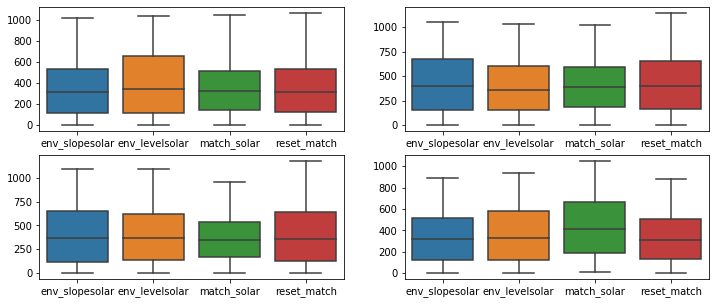

In [10]:


def boxplot():
    f, axes = plt.subplots(2, 2, figsize=(12, 5))
    
    sns.boxplot(data = banpo1[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]], ax=axes[0][0])
    sns.boxplot(data = newrec1[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]], ax=axes[0][1])
    sns.boxplot(data = lh[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]], ax=axes[1][0])
    sns.boxplot(data = ongok[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]], ax=axes[1][1])

boxplot()

In [12]:
def resampleD_sum(df):
    return df.resample('D').sum()


def resampleD_mean(df):
    return df.resample('D').mean()


def delete_zero(df):
    df = df[(df["env_slopesolar"] != 0 ) & ( df["env_levelsolar"] != 0 ) & ( df["match_solar"] != 0 )& ( df["reset_match"] != 0 )]
    
    return df


def mean_absolute_percentage_error(a, b, df):

    a_set, b_set = np.array(df[a]), np.array(df[b])

    return np.mean(np.abs((a_set - b_set) / a_set)) * 100 ##,  np.abs((a_set - b_set) / a_set)

def mean_absolute_percentage_error2(a, b, df):

    a_set, b_set = np.array(df[a]), np.array(df[b])

    return np.mean(np.abs((a_set - b_set) / a_set)) * 100, np.abs((a_set - b_set) / a_set)

def make_graph(a, b, df):
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=df.index, y=df[a], mode='lines', name=a, line=dict(color='blue')), secondary_y = False)
    fig.add_trace(go.Scatter(x=df.index, y=df[b], mode='lines', name=b, line=dict(color='red')), secondary_y = False)
    fig.update_layout(width=1000, height=500,)
    fig.show()

def corr(a, b, df):
    return df[[a, b]].corr()


In [16]:
banpo1_day = delete_zero(resampleD_sum(banpo1))
newrec1_day = delete_zero(resampleD_sum(newrec1))
lh_day = delete_zero(resampleD_sum(lh))
ongok_day = delete_zero(resampleD_sum(ongok))

def for_print(a, b, name, df):

    print(name," - ", a,",", b," : ", mean_absolute_percentage_error(a, b, df))


for_print("env_slopesolar", "reset_match", "banpo1", banpo1_day)
for_print("env_slopesolar", "reset_match", "newrec1", newrec1_day)
for_print("env_slopesolar", "reset_match", "lh", lh_day)
for_print("env_slopesolar", "reset_match", "ongok", ongok_day)

for_print("env_slopesolar", "match_solar", "banpo1", banpo1_day)
for_print("env_slopesolar", "match_solar", "newrec1", newrec1_day)
for_print("env_slopesolar", "match_solar", "lh", lh_day)
for_print("env_slopesolar", "match_solar", "ongok", ongok_day)

# boxplot()

banpo1, lh, 

banpo1  -  env_slopesolar , reset_match  :  7.1951303768820445
newrec1  -  env_slopesolar , reset_match  :  18.005411740639172
lh  -  env_slopesolar , reset_match  :  8.849778164945214
ongok  -  env_slopesolar , reset_match  :  11.82214185728767
banpo1  -  env_slopesolar , match_solar  :  9.295852296152567
newrec1  -  env_slopesolar , match_solar  :  20.575481219383054
lh  -  env_slopesolar , match_solar  :  24.56966448174712
ongok  -  env_slopesolar , match_solar  :  38.63580674696487
